# Batch Size and Gradient Descent
[Source](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

Neural networks are trained using the stochastic gradient descent optimization algorithm.

This involves using the current state of the model to make a prediction, comparing the prediction to the expected values, and using the difference as an estimate of the error gradient. This error gradient is then used to update the model weights and the process is repeated.

The error gradient is a statistical estimate. The more training examples used in the estimate, the more accurate this estimate will be and the more likely that the weights of the network will be adjusted in a way that will improve the performance of the model. The improved estimate of the error gradient comes at the cost of having to use the model to make many more predictions before the estimate can be calculated, and in turn, the weights updated.



_Optimization algorithms that use the entire training set are called batch or deterministic gradient methods, because they process all of the training examples simultaneously in a large batch._

— Page 278, Deep Learning, 2016.


Alternately, using fewer examples results in a less accurate estimate of the error gradient that is highly dependent on the specific training examples used.

This results in a noisy estimate that, in turn, results in noisy updates to the model weights, e.g. many updates with perhaps quite different estimates of the error gradient. Nevertheless, these noisy updates can result in faster learning and sometimes a more robust model.

_Optimization algorithms that use only a single example at a time are sometimes called stochastic or sometimes online methods. The term online is usually reserved for the case where the examples are drawn from a stream of continually created examples rather than from a fixed-size training set over which several passes are made._

— Page 278, Deep Learning, 2016.

The number of training examples used in the estimate of the error gradient is a hyperparameter for the learning algorithm called the “batch size,” or simply the “batch.”

A batch size of 32 means that 32 samples from the training dataset will be used to estimate the error gradient before the model weights are updated. One training epoch means that the learning algorithm has made one pass through the training dataset, where examples were separated into randomly selected “batch size” groups.

Historically, a training algorithm where the batch size is set to the total number of training examples is called “batch gradient descent” and a training algorithm where the batch size is set to 1 training example is called “stochastic gradient descent” or “online gradient descent.”

A configuration of the batch size anywhere in between (e.g. more than 1 example and less than the number of examples in the training dataset) is called “minibatch gradient descent.”

- __Batch Gradient Descent__. Batch size is set to the total number of examples in the training dataset.
- __Stochastic Gradient Descent__. Batch size is set to one.
- __Minibatch Gradient Descent__. Batch size is set to more than one and less than the total number of examples in the training dataset.
For shorthand, the algorithm is often referred to as stochastic gradient descent regardless of the batch size. Given that very large datasets are often used to train deep learning neural networks, the batch size is rarely set to the size of the training dataset.

Smaller batch sizes are used for two main reasons:

1- Smaller batch sizes are noisy, offering a regularizing effect and lower generalization error.
2- Smaller batch sizes make it easier to fit one batch worth of training data in memory (i.e. when using a GPU).

A third reason is that the batch size is often set at something small, such as 32 examples, and is not tuned by the practitioner. Small batch sizes such as 32 do work well generally.

# Batch gradient descent

Batch size=whole dataset

If X is of 1000 samples, then the delta_W[t+1] = step * gradient(f)(W[t]) is calculated and accumulated every sample, but the application of weight update is done once after all 1000 samples are fed.

- Update once at the end
- High accumulation of error, Risk of saturation
- Slow feedback, slow convergence, but more stable
- Take advantage of parallelism in matrix operations (comp. arch.)

# Make blobs

Used for quick-dirty artificial data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

(1000, 2)
(1000,)


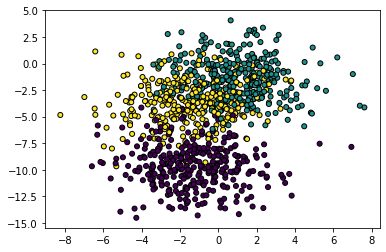

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

Train: 0.814, Test: 0.828


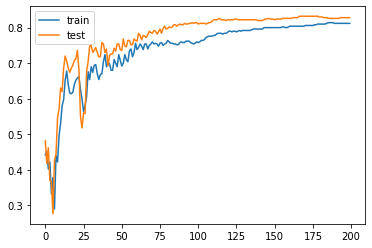

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=len(trainX))
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

We can see that the model is relatively slow to learn this problem, converging on a solution after about 100 epochs after which changes in model performance are minor.

# SGD
Batch size = 1 example

Train: 0.616, Test: 0.594


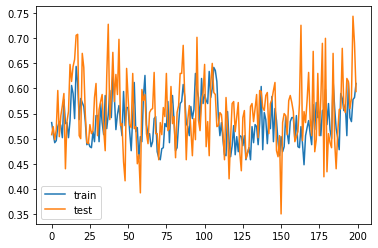

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

The plot shows the unstable nature of the training process with the chosen configuration. 
# SGD with small LR
The poor performance and violent changes to the model suggest that the learning rate used to update weights after each training example may be too large and that a smaller learning rate may make the learning process more stable.

Train: 0.838, Test: 0.810


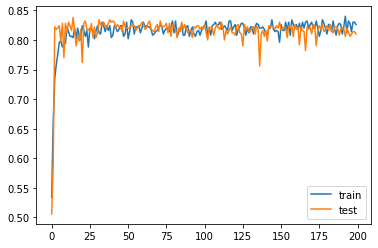

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

The line plot shows the expected behavior. Namely, that the model rapidly learns the problem as compared to batch gradient descent, leaping up to about 80% accuracy in about 25 epochs rather than the 100 epochs seen when using batch gradient descent. We could have stopped training at epoch 50 instead of epoch 200 due to the faster training.

This is not surprising. With batch gradient descent, 100 epochs involved 100 estimates of error and 100 weight updates. In stochastic gradient descent, 25 epochs involved (500 * 25) or 12,500 weight updates, providing more than 10-times more feedback, albeit more noisy feedback, about how to improve the model.

The line plot also shows that train and test performance remain comparable during training, as compared to the dynamics with batch gradient descent where the performance on the test set was slightly better and remained so throughout training.

Unlike batch gradient descent, we can see that the noisy updates result in noisy performance throughout the duration of training. This variance in the model means that it may be challenging to choose which model to use as the final model, as opposed to batch gradient descent where performance is stabilized because the model has converged.

This example highlights the important relationship between batch size and the learning rate. Namely, more noisy updates to the model require a smaller learning rate, whereas less noisy more accurate estimates of the error gradient may be applied to the model more liberally. We can summarize this as follows:

- __Batch Gradient Descent__: Use a relatively larger learning rate and more training epochs.

- __Stochastic Gradient Descent__: Use a relatively smaller learning rate and fewer training epochs.
Mini-batch gradient descent provides an alternative approach.

# Mini-batch gradient descent

Train: 0.828, Test: 0.818


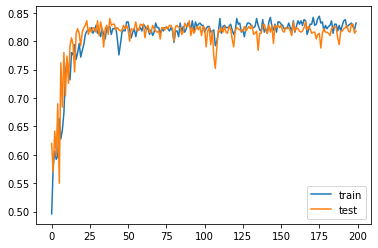

In [ ]:
# mlp for the blobs problem with minibatch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically, the model learns fast and has noisy updates but also stabilizes more towards the end of the run, more so than stochastic gradient descent.

Holding learning rate constant and varying the batch size allows you to dial in the best of both approaches.

# Effect of Batch Size on Model Behavior
We can refit the model with different batch sizes and review the impact the change in batch size has on the speed of learning, stability during learning, and on the final result.

First, we can clean up the code and create a function to prepare the dataset.

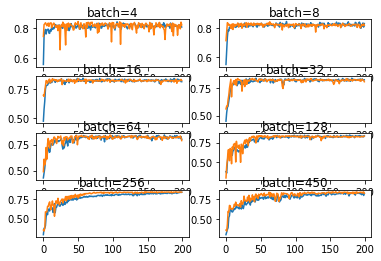

In [ ]:
# mlp for the blobs problem with minibatch gradient descent with varied batch size
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
	# plot learning curves
	pyplot.plot(history.history['acc'], label='train')
	pyplot.plot(history.history['val_acc'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()

The plots show that small batch results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy.